In [1]:
import time

import pandas as pd # used to load the data
import numpy as np # optimized numerical library

from sklearn import preprocessing, metrics, utils, decomposition, model_selection, linear_model, discriminant_analysis, svm, tree, ensemble # library providing several ML algorithms and related utility

from imblearn import over_sampling # provides several resampling techniques to cope with unbalanced datasets (https://github.com/scikit-learn-contrib/imbalanced-learn) compatible with sklearn

from collections import Counter

import matplotlib.pyplot as plt # used for plotting

# Start by defining three helper functions:
# - one to plot the sample distribution  acorss the class labels (to see how un-/balanced the dataset is)
# - one to compute and plot the confusion matrix
# - one to plot data in 2D with different colors per class label

def plot_pie(y, labels, title=""):
    target_stats = Counter(y)
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    fig, ax = plt.subplots()
    ax.set_title(title + " (size: %d)" % len(y))
    ax.pie(sizes, explode=explode, labels=target_stats.keys(), shadow=True, autopct='%1.1f%%')
    ax.axis('equal')


def compute_and_plot_cm(ytest, ypred, labels, title=""):
    global nfigure
    # Compute confusion matrix
    cm = metrics.confusion_matrix(ytest, ypred)
    
    accuracy = metrics.accuracy_score(ytest, ypred, normalize=True)

    # Normalize the matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    # Plot the confusion matrix

    nfigure = nfigure + 1
    plt.figure(nfigure) # new numbered figure
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues) # plot the confusionmatrix using blue shaded colors
    plt.title("Confusion Matrix Normalized (%s) Accuracy: %.1f%%" % (title, accuracy*100)) # add title
    plt.colorbar() # plot the color bar as legend

    # Plot the x and y ticks using the class label names
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)


def plot_2d(xpred, ypred, labels, title=""):
    global nfigure
    # define the colors to use for each class label
    colors = ['red', 'blue', 'green', 'yellow', 'black']
    len_colors = len(colors)
    if len_colors < len(labels):
        print("WARNING: we have less colors than classes: some classes will reuse the same color")

    nfigure = nfigure + 1
    plt.figure(nfigure) # new numbered figure
    plt.title("Feature Space (%s)" % title) # add title


    # plot each class label with a separate color 
    for c in range(len(labels)):
        cur_class = (ypred == c) # get all points belonging to class c
        plt.plot(xpred[cur_class, 0], xpred[cur_class, 1], 'o', color=colors[c % len_colors]) # plot class c


nfigure = 0 #used to number the figures

# 1. Loading the data

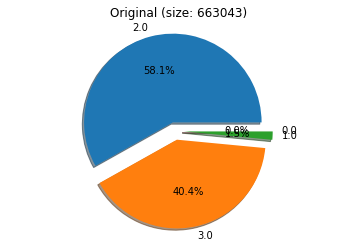

In [7]:
################ Load data ####################
# Get the dataset loaded and define class labels 
data = pd.read_csv('data/jobs.csv', header=0)
data_class_labels = ["evict", "fail", "finish", "kill"]

# All data columns except last are input features (X), last column is output label (y)
n_features = len(data.columns) - 1

X = data.iloc[:,0:n_features]
y = data.iloc[:,n_features]


y = y - 2 #First two labels not in dataset, shift by two

plot_pie(y, data_class_labels, "Original")
plt.show()

### What problem do you see? 


### Lets make the data balance: over_sampling.SMOTE

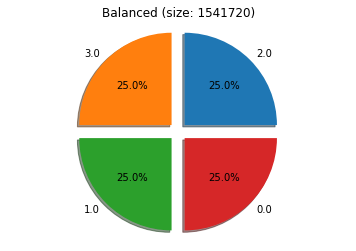

In [8]:
################ Resample data #################

# Google data is very skewed, try to balance the dataset
sm = over_sampling.SMOTE(random_state=42, ratio="auto")
X, y = sm.fit_sample(X, y)

# Plot the balanced label distribution
plot_pie(y, data_class_labels, "Balanced")
plt.show()

### Lets have a smaller number of samples:  utils.resample()

In [ ]:
# Resample the data with simple random resampling (if too big)
# - replace decideds if sampling with or without replacement
# - n_samples decide the size of the ouput: if set to None ouput = input (i.e. no resampling)
X, y = utils.resample(X, y, replace=False, n_samples=10000)

# Plot the resampled label distribution

plot_pie(y, data_class_labels, "Sampled")
plt.show()

# 2. Preparing the data

In [ ]:
################ Split data ####################
# Split data in training and testing
#X_train, X_test, y_train, y_test = model_selection.train_test_split( , , , )

### Standardize the data

In [ ]:
################ Scale data ####################
# Train a scaler to standardize the features (zero mean and unit variance)
#scaler = preprocessing.StandardScaler().fit()

# ... and scale the features
#X_train_scaled = scaler.transform()
#X_test_scaled = 

### Finding the 2 principle components

In [ ]:
################ PCA ####################
# Train a PCA with 2 dimensions
#pca = decomposition.PCA(n_components=).fit()

# ... and apply it to the features
#X_train_scaled_pca = pca.transform()
#X_test_scaled_pca = 

# 3. Logistic Regression

In [ ]:
################ Logit ##################
# Train a Logit model on the original features
#lr = linear_model.LogisticRegression().fit(,)

# Compute the predicted labels on test data
#y_lr = lr.predict()

# Prit the accuracy
#print("Acuracy of LR : %.1f%%" % (metrics.accuracy_score(,)*100))

#Compute and print and confusion matrix
#compute_and_plot_cm(, , , title="")

### Apply LR on PCA components

In [ ]:
# Train a Logit model on pca extracted features
#lr_pca = linear_model.LogisticRegression().fit(X_train_scaled_pca, y_train)

# Compute the predicted labels on test data
#y_lr_pca = lr_pca.predict(X_test_scaled_pca)

# Prit the accuracy
#print("Acuracy of LR + PCA: %.1f%%" % (metrics.accuracy_score(y_test,y_lr_pca)*100))


#Compute and print and confusion matrix
#compute_and_plot_cm(y_test, y_lr_pca, data_class_labels, title="LR + PCA")

# visualize the predictions based on 2 PCA components
#plot_2d(X_test_scaled_pca, y_lr_pca, data_class_labels, title="LR + PCA")

# 4. Apply LDA

In [ ]:
################ LDA ##################
# Train an LDA model on original features
#lda = discriminant_analysis.LinearDiscriminantAnalysis().fit(,)

# Compute the predicted labels on test data
#y_lda = lda

# Prit the accuracy
#print("Acuracy of LDA : %.1f%%" % (metrics.accuracy_score(,)*100))

#Compute and print and confusion matrix
#compute_and_plot_cm(, , , title="")

### Apply LDA on 2 princinple components

In [ ]:
# Train an LDA model on pca extracted features
#lda_pca = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train_scaled_pca, y_train)

# Compute the predicted labels on test data
#y_lda_pca = lda_pca.predict(X_test_scaled_pca)

# Pring the accuracy
#print("Acuracy of LDA + PCA: %.1f%%" % (metrics.accuracy_score(y_test,y_lda_pca)*100))

#Compute and print and confusion matrix
#compute_and_plot_cm(y_test, y_lda_pca, data_class_labels, title="LDA + PCA")

# visualize the predictions based on 2 PCA components
#plot_2d(X_test_scaled_pca, y_lda_pca, data_class_labels, title="LDA + PCA")

# 5. Apply QDA

In [ ]:
################ QDA ##################
# Train a QDA model on original features
#qda = discriminant_analysis.QuadraticDiscriminantAnalysis().fit(,)

# Compute the predicted labels on test data
#y_qda =

# Print the accuracy

#Compute and print and confusion matrix


### Apply LDA on 2 princinple components

In [ ]:
# Train a QDA model on pca extracted features
#qda_pca = discriminant_analysis.QuadraticDiscriminantAnalysis().fit(X_train_scaled_pca, y_train)

# Compute the predicted labels on test data
#y_qda_pca = qda_pca.predict(X_test_scaled_pca)

# Print the accuracy
#print("Acuracy of QDA + PCA: %.1f%%" % (metrics.accuracy_score(y_test,y_qda_pca)*100))

#Compute and print and confusion matrix
#compute_and_plot_cm(y_test, y_qda_pca, data_class_labels, title="QDA + PCA")

#plot_2d(X_test_scaled_pca, y_qda_pca, data_class_labels, title="QDA + PCA")

# 6. Applyd ELDA
### Lets get the expanded bases from the 2 PCA

In [ ]:
################ Polynomial expanded features ##################
# Train a polynomial expansion on original features
#poly2 = preprocessing.PolynomialFeatures(degree=).fit()

# ... and apply it to the features
#X_train_scaled_poly2 = poly2.transform()
#X_test_scaled_poly2 = poly2.transform()

### Run LDA

In [ ]:
################  LDA on expanded ##################
# Train an LDA model on the original expanded features
#lda_poly2 = 

# Compute the predicted labels on test data
#y_lda_poly2 = lda_poly2

# Print the accuracy

#Compute and print and confusion matrix

# 7. Apply Support Vector Machine

In [ ]:
################ SVM ##################
# Train a SVM model on the original features
#sv = svm.SVC().fit(,)

# Compute the predicted labels on test data
#y_sv = sv

# Print the accuracy

#Compute and print and confusion matrix

# 8. Apply Decision Tree

In [ ]:
################ DecisionTree ##################
# Train a DT model on the original features
#dt = tree.DecisionTreeClassifier(max_depth=).fit(, )

# Compute the predicted labels on test data
#y_dt = dt

#print the accuracy

# Compute and show confusion matrix



# 9. Apply Random Forest

In [ ]:
################ RandomForest ##################
# Train a RF model on the original features
#rf = ensemble.RandomForestClassifier().fit(,)

# Compute the predicted labels on test data
#y_rf = rf

#print the accuracy

# Compute and show confusion matrix
